In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
things = [["A1", "A2", "A3"], ["A4", "A5", "A6"], ["B1", "B2", "B3"], ["B4", "B5", "B6"], ["C1", "D1"], ["C2", "D2"], ["C3", "D3"], ["C4", "C5", "C6"], ["D4", "D5", "D6"]]
keys = ["2", "4", "75", "100", "C1", "C2", "C3", "1", "50"]


In [210]:
def barplot_annotate_brackets(num1_list, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """
    num1 = num1_list[0]
    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .01

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'
        if len(text) > 2:
            text = "**"

    if isinstance(num2, (tuple, list, np.ndarray, pd.DataFrame)):
        rx = np.mean([center[num] for num in num2])
        ry = np.max(height[num1: num2[-1]])
    else:
        rx, ry = center[num2], np.max(height[num1:num2])
    lx, ly = center[num1], height[num1]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]


    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')
    for num1 in num1_list:
        lx = center[num1]
        plt.plot([lx, lx], [y, y+barh], c='black')
    if isinstance(num2, (tuple, list, np.ndarray, pd.DataFrame)):
        barx2 = [center[num2[0]], center[num2[-1]]]
        bary2 = [y, y]
        plt.plot(barx2, bary2, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

In [90]:
gene_file = pd.read_csv("Gene_delivery.csv")
gene_file.set_index(["X", "Y"], inplace=True)
gene_file.dropna(inplace=True)
gene_file = gene_file / ((gene_file["C1"].mean() + gene_file["D1"].mean()) / 2)

new_dict = {}
new_list = []
for key, thing in zip(keys, things):
    new_list.append(gene_file[thing].to_numpy().flatten())
for key, condition in zip(keys, new_list):
    new_dict[key] = pd.Series(condition).describe()
new_df = pd.DataFrame().from_dict(new_dict)
new_df = new_df.transpose()
new_df["sem"] = new_df["std"] / np.sqrt(new_df["count"])


In [95]:
gene_file

A1        A2        A3        A4        A5        A6        B1   
X Y                                                                         
1 2  0.806876  1.061678  0.934277  0.934277  0.934277  1.104146  1.019211  \
  3  0.806876  1.104146  1.019211  1.061678  0.976744  1.061678  0.976744   
  4  0.849343  1.061678  1.061678  1.019211  0.934277  1.061678  1.019211   
2 1  0.849343  1.104146  0.806876  0.679474  0.934277  0.594540  0.891810   
  2  0.849343  0.976744  0.934277  0.849343  0.891810  1.104146  0.976744   
  3  0.806876  1.061678  1.061678  1.104146  0.976744  1.104146  0.976744   
  4  0.891810  0.976744  1.061678  1.146613  0.849343  1.019211  0.976744   
  5  0.976744  0.976744  1.061678  1.189080  0.849343  0.806876  1.019211   
3 1  0.806876  0.424671  0.339737  0.467139  0.467139  0.594540  0.976744   
  2  0.891810  1.019211  0.976744  0.849343  0.891810  1.104146  0.976744   
  3  0.721941  0.934277  0.976744  1.061678  0.976744  1.061678  1.019211   
  4  0.679474  0.934277  1.019211  1.104146  0.934277  0.976744  0.976744   
  5  0.764408  0.934277  1.104146  1.189080  0.934277  1.061678  1.061678   
4 1  0.976744  1.061678  1.019211  0.891810  1.019211  1.231547  1.019211   
  2  0.721941  1.019211  0.849343  0.891810  0.976744  1.104146  1.019211   
  3  0.764408  0.891810  1.104146  1.061678  0.976744  1.061678  1.061678   
  4  0.679474  0.849343  1.104146  1.061678  0.934277  1.019211  1.061678   
  5  0.764408  0.764408  1.189080  1.104146  0.976744  1.019211  1.061678   
5 2  1.019211  1.104146  1.019211  1.146613  1.231547  1.358948  1.104146   
  3  0.891810  0.976744  1.019211  1.061678  1.104146  1.146613  1.019211   
  4  0.764408  0.934277  1.146613  1.146613  1.104146  1.231547  1.061678   

           B2        B3        B4  ...        C3        C4        C5   
X Y                                ...                                 
1 2  1.146613  1.061678  0.806876  ...  1.189080  1.274014  1.231547  \
  3  1.189080  1.104146  1.189080  ...  1.231547  1.274014  1.146613   
  4  1.061678  1.231547  1.231547  ...  1.274014  1.274014  1.274014   
2 1  1.104146  1.104146  1.231547  ...  1.189080  1.189080  1.146613   
  2  1.146613  1.146613  1.189080  ...  1.189080  1.189080  1.231547   
  3  1.189080  1.316481  1.358948  ...  1.274014  1.316481  1.316481   
  4  1.189080  1.231547  1.146613  ...  1.274014  1.316481  1.231547   
  5  1.231547  1.274014  1.231547  ...  1.274014  1.189080  1.231547   
3 1  1.104146  1.189080  1.189080  ...  1.274014  1.189080  1.189080   
  2  1.146613  1.358948  1.316481  ...  1.146613  1.231547  1.231547   
  3  1.189080  1.189080  1.316481  ...  1.274014  1.274014  1.189080   
  4  1.189080  1.231547  1.274014  ...  1.274014  1.274014  1.231547   
  5  1.231547  1.231547  1.274014  ...  1.274014  1.231547  1.274014   
4 1  1.061678  1.189080  1.146613  ...  1.189080  1.274014  1.189080   
  2  1.104146  1.146613  1.189080  ...  1.061678  1.231547  1.231547   
  3  1.146613  1.316481  1.274014  ...  1.231547  1.316481  1.189080   
  4  1.146613  1.189080  1.231547  ...  1.231547  1.274014  1.146613   
  5  1.189080  1.189080  1.274014  ...  1.274014  1.274014  1.146613   
5 2  1.019211  1.189080  1.189080  ...  1.189080  1.316481  1.189080   
  3  1.061678  1.274014  1.189080  ...  1.231547  1.274014  1.189080   
  4  1.061678  1.316481  1.231547  ...  1.358948  1.358948  1.189080   

           C6        D1        D2        D3        D4        D5        D6  
X Y                                                                        
1 2  0.976744  1.019211  1.189080  1.358948  1.358948  1.146613  0.934277  
  3  1.019211  0.976744  1.104146  1.358948  1.274014  1.146613  0.934277  
  4  0.934277  1.019211  1.061678  1.274014  1.231547  1.104146  0.976744  
2 1  0.849343  1.061678  1.146613  1.316481  1.316481  1.146613  0.976744  
  2  0.976744  1.019211  1.231547  1.189080  1.316481  1.146613  1.019211  
  3  1.104146  1.019211  1.274014  1.358948  1.316

In [92]:
full_df = pd.DataFrame().from_records(new_list)
full_df = full_df.transpose().rename(columns = {num : key for num, key in zip(np.arange(0, len(keys), 1), keys)})
full_df

,2,4,75,100,C1,C2,C3,1,50
0,0.806876,0.934277,1.019211,0.806876,0.976744,1.104146,1.189080,1.274014,1.358948
1,1.061678,0.934277,1.146613,1.146613,1.019211,1.189080,1.358948,1.231547,1.146613
2,0.934277,1.104146,1.061678,1.146613,0.891810,1.189080,1.231547,0.976744,0.934277
3,0.806876,1.061678,0.976744,1.189080,0.976744,1.104146,1.358948,1.274014,1.274014
4,1.104146,0.976744,1.189080,1.189080,1.019211,1.061678,1.274014,1.146613,1.146613
...,...,...,...,...,...,...,...,...,...
58,0.976744,1.104146,1.061678,1.019211,NaN,NaN,NaN,1.189080,1.146613
59,1.019211,1.146613,1.274014,1.104146,NaN,NaN,NaN,1.146613,1.104146
60,0.764408,1.146613,1.061678,1.231547,NaN,NaN,NaN,1.358948,1.231547
61,0.934277,1.104146,1.061678,1.146613,NaN,NaN,NaN,1.189080,1.274014


In [240]:
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

PEI_keys = ["C1", "C2", "1", "2", "4"]
PBAE_keys = ["C1", "C3", "50", "75", "100"]
stats_dict = {}
for cond in PEI_keys:
    cond_dict = {}
    for cond2 in PEI_keys:
        if cond == cond2:
            cond_dict[cond2] = np.NaN
        else:

            res = mannwhitneyu(full_df[cond], full_df[cond2], nan_policy="omit")
            cond_dict[cond2] = res.pvalue
    stats_dict[cond] = cond_dict
pei_stats_df = pd.DataFrame().from_dict(stats_dict)
pei_stats_df

,C1,C2,1,2,4
C1,NaN,2.110483e-09,3.833730e-09,1.502193e-02,4.640157e-01
C2,2.110483e-09,NaN,4.764589e-01,3.770875e-12,3.226177e-07
1,3.833730e-09,4.764589e-01,NaN,7.338648e-14,5.105014e-09
2,1.502193e-02,3.770875e-12,7.338648e-14,NaN,4.850762e-03
4,4.640157e-01,3.226177e-07,5.105014e-09,4.850762e-03,NaN


In [241]:
stats_dict = {}
for cond in PBAE_keys:
    cond_dict = {}
    for cond2 in PBAE_keys:
        if cond == cond2:
            cond_dict[cond2] = np.NaN
        else:

            res = mannwhitneyu(full_df[cond], full_df[cond2], nan_policy="omit")
            cond_dict[cond2] = res.pvalue
    stats_dict[cond] = cond_dict
pbae_stats_df = pd.DataFrame().from_dict(stats_dict)
pbae_stats_df

,C1,C3,50,75,100
C1,NaN,2.643718e-13,9.664641e-09,4.072671e-08,9.697055e-07
C3,2.643718e-13,NaN,5.880336e-04,3.191459e-06,3.210517e-06
50,9.664641e-09,5.880336e-04,NaN,3.236742e-01,2.856385e-01
75,4.072671e-08,3.191459e-06,3.236742e-01,NaN,8.020042e-01
100,9.697055e-07,3.210517e-06,2.856385e-01,8.020042e-01,NaN


In [173]:
pei_df = full_df[["C1", "C2", "1", "2", "4"]]
pei_df.rename(columns={"C1": "Untreated", "C2":"PEI + NaCl"}, inplace=True)

pbae_df = full_df[["C1", "C3", "50", "75", "100"]]
pbae_df.rename(columns={"C1": "Untreated", "C3":"PBAE + NaAc"}, inplace=True)

/tmp/ipykernel_270338/2190054288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pei_df.rename(columns={"C1": "Untreated", "C2":"PEI + NaCl"}, inplace=True)
/tmp/ipykernel_270338/2190054288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbae_df.rename(columns={"C1": "Untreated", "C3":"PBAE + NaAc"}, inplace=True)


In [195]:
def boxplot(full_df):
    df_melt = pd.melt(full_df.reset_index(), id_vars=['index'], value_vars=full_df.columns)
    df_melt.columns= ["index", r"Polymer to DNA w/w Ratio", r"Normalized RFU"]
    # ax = sns.boxplot(x=r"Polymer to DNA w/w Ratio", y=r"Normalized RFU", data=df_melt)
    ax = sns.violinplot(x=r"Polymer to DNA w/w Ratio", y=r"Normalized RFU", data=df_melt, palette=sns.dark_palette("#8BF", n_colors=8)[2:7])


Untreated     1.000000
PEI + NaCl    1.153691
1             1.163465
2             0.924840
4             0.995618
dtype: float64

In [211]:
def annotate(pairs, offsets):
    count = 0
    for (i,  j) in pairs:
        significance = np.min(pei_stats_df.iloc[i, j])
        print(significance)
        barplot_annotate_brackets(i, j, significance, np.arange(0, 5, 1), (pei_df.max() * (pei_df.var() * 10 + 1)).to_list(), dh=offsets[count])
        count += 1

6.810984150972093e-13
4.0189855526671027e-16
0.01766780219376458
1.542596393531282e-11
6.810984150972093e-13
4.0189855526671027e-16
0.01766780219376458
1.542596393531282e-11


Text(0.5, 1.0, 'Normalized RFU of Cells treated with PBAE/GFP-DNA Nanoparticles')

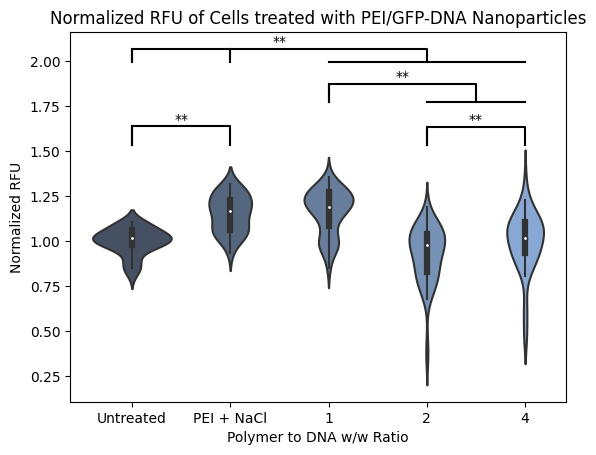

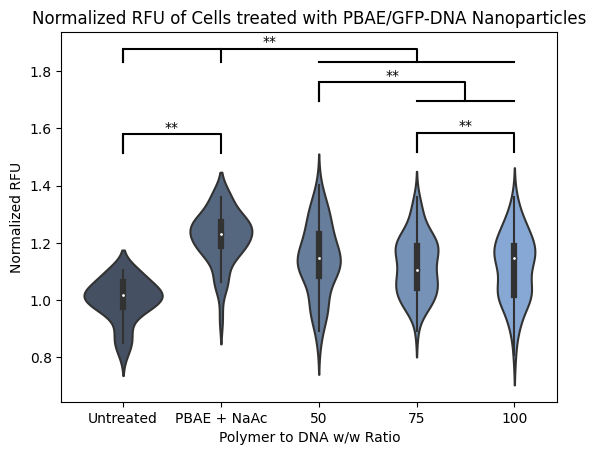

In [239]:
pairs = [[[0, 1], [2, 3, 4]], [[2], [3, 4]], [[3], [4]], [[0], [1]]]
offsets = [0.3, 0.1, 0.02, 0.18]


boxplot(pei_df)
plt.title("Normalized RFU of Cells treated with PEI/GFP-DNA Nanoparticles")

annotate(pairs, offsets)
plt.figure()
boxplot(pbae_df)
offsets = [0.3, 0.1, 0.02, 0.27]
annotate(pairs, offsets)
plt.title("Normalized RFU of Cells treated with PBAE/GFP-DNA Nanoparticles")

In [54]:
new_df

,count,mean,std,min,25%,50%,75%,max,sem
2,63.0,0.924840,0.159709,0.339737,0.828109,0.976744,1.040445,1.189080,0.020121
4,63.0,0.995618,0.170514,0.467139,0.934277,1.019211,1.104146,1.358948,0.021483
75,63.0,1.121672,0.103921,0.891810,1.040445,1.104146,1.189080,1.358948,0.013093
100,63.0,1.113583,0.118271,0.806876,1.019211,1.146613,1.189080,1.358948,0.014901
C1,42.0,1.000000,0.074566,0.806876,0.976744,1.019211,1.061678,1.104146,0.011506
C2,42.0,1.153691,0.103138,0.934277,1.061678,1.167846,1.231547,1.316481,0.015915
C3,42.0,1.220425,0.092405,0.934277,1.189080,1.231547,1.274014,1.358948,0.014258
1,63.0,1.163465,0.123586,0.849343,1.082912,1.189080,1.274014,1.358948,0.015570
50,63.0,1.141220,0.124746,0.849343,1.082912,1.146613,1.231547,1.401416,0.015717
